In [2]:
import numpy as np
from typing import Callable

# Exercício 1

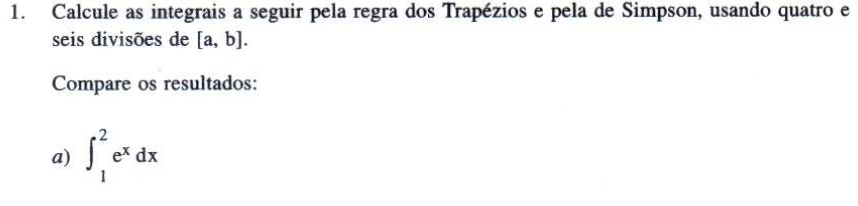

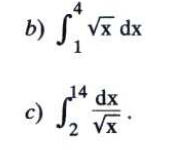

## Declaração dos métodos

In [3]:
def regra_trapezios(f: Callable[[float], float], a: float, b: float, r: int) -> float:
    n = r + 1
    pontos = np.linspace(a, b, n)
    h = pontos[1] - pontos[0]
    integral_soma = (f(a) + f(b)) / 2
    for i in range(1, n - 1):
        integral_soma += f(pontos[i])
    return h * integral_soma

In [4]:
def regra_simpson(f: Callable[[float], float], a: float, b: float, r: int) -> float:
    n = r + 1
    pontos = np.linspace(a, b, n)
    h = pontos[1] - pontos[0]
    integral_soma = f(a) + f(b)
    for i in range(1, n - 1):
        mult = 2 + 2 * (i % 2 == 1)
        integral_soma += mult * f(pontos[i])
    return (h / 3) * integral_soma

In [60]:
def trunc_n_decimals(value: float, n: int) -> float:
    factor = 10 ** n
    return np.trunc(value * factor) / factor

## Calculando item a item

Item a), valor esperado: 4.67077427

In [5]:
ex1a_expected = 4.67077427

In [6]:
ex1a = {
    "f": lambda x: np.exp(x),
    "a": 1,
    "b": 2,
}

ex1a_results = {
    "trapezios_r4": regra_trapezios(**ex1a, r=4),
    "simpson_r4": regra_simpson(**ex1a, r=4),
    "trapezios_r6": regra_trapezios(**ex1a, r=6),
    "simpson_r6": regra_simpson(**ex1a, r=6),
}

In [7]:
display("Resultados para o item a) do Exercício 1:", ex1a_results)

'Resultados para o item a) do Exercício 1:'

{'trapezios_r4': np.float64(4.695075916875121),
 'simpson_r4': np.float64(4.670874883494676),
 'trapezios_r6': np.float64(4.681581245712669),
 'simpson_r6': np.float64(4.670794226633776)}

Item b), valor esperado: 4.66666667

In [8]:
ex1b_expected = 4.66666667

In [9]:
ex1b = {
    "f": lambda x: np.sqrt(x),
    "a": 1,
    "b": 4,
}

ex1b_results = {
    "trapezios_r4": regra_trapezios(**ex1b, r=4),
    "simpson_r4": regra_simpson(**ex1b, r=4),
    "trapezios_r6": regra_trapezios(**ex1b, r=6),
    "simpson_r6": regra_simpson(**ex1b, r=6),
}

In [10]:
display("Resultados para o item b) do Exercício 1:", ex1b_results)

'Resultados para o item b) do Exercício 1:'

{'trapezios_r4': np.float64(4.65509259251136),
 'simpson_r4': np.float64(4.666220708306385),
 'trapezios_r6': np.float64(4.661488382402361),
 'simpson_r6': np.float64(4.6665630532224895)}

Item c), valor esperado: 4.65488765

In [11]:
ex1c_expected = 4.65488765

In [12]:
ex1c = {
    "f": lambda x: 1 / np.sqrt(x),
    "a": 2,
    "b": 14,
}

ex1c_results = {
    "trapezios_r4": regra_trapezios(**ex1c, r=4),
    "simpson_r4": regra_simpson(**ex1c, r=4),
    "trapezios_r6": regra_trapezios(**ex1c, r=6),
    "simpson_r6": regra_simpson(**ex1c, r=6),
}

In [13]:
display("Resultados para o item c) do Exercício 1:", ex1c_results)

'Resultados para o item c) do Exercício 1:'

{'trapezios_r4': np.float64(4.768387026661444),
 'simpson_r4': np.float64(4.676374564596406),
 'trapezios_r6': np.float64(4.707777186436547),
 'simpson_r6': np.float64(4.66148949120848)}

# Exercício 2

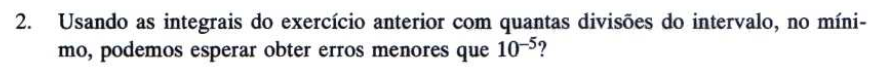

Dado que o erro _aproximado_ da Regra dos Trapézios e da Regra de Simpson são, respectivamente:

$$ E (f) = -\frac{(b - a)^3}{12 N^2} f''(\xi)  $$

e

$$ E (f) = -\frac{(b - a)^5}{180 N^4} f^{(4)} $$

Podemos declarar a inequação

$$ |E(f)| < 10^{-5} $$

para cada item e verificar o valor mínimo de N que satisfaz a condição.

## Item a)

Dado

$$ f(x) = e^x $$

logo por propriedades da função exponencial, temos que tanto a segunda derivada quanto a quarta serão $e^x$. Portanto, o maior valor dessas derivadas no intervalo apresentado é justamente $e^2$.

No caso do Trapézio:
$$ |E(f)| < \frac{(2 - 1)^3}{12 N^2} e^2 \Rightarrow |E(f)| < \frac{e^2}{12 N^2} $$

Para garantirmos a inequação anterior, precisamos que:
$$ \frac{e^2}{12 N^2} < 10^{-5} \Rightarrow N^2 > \frac{e^2}{12 \cdot 10^{-5}} \Rightarrow N > \sqrt{\frac{e^2}{12 \cdot 10^{-5}}} $$

Por fim, obtemos $ N > 248.14404585$, portanto, se tomarmos $N = 249$, a condição deve ser satisfeita.

No caso da regra de Simpson:

$$ |E(f)| < \frac{(2 - 1)^5}{180 N^4} e^2 \Rightarrow |E (f)| < \frac{e^2}{180 N^4} $$

Para garantirmos a inequação anterior, precisamos que:

$$ \frac{e^2}{180 N^4} < 10^{-5} \Rightarrow N^4 > \frac{e^2}{180 \cdot 10^{-5}} \Rightarrow \sqrt[4]{\frac{e^2}{180 \cdot 10^{-5}}} $$

Por fim, obtemos $ N > 8.00440610 $, portanto, devemos tomar $N = 10$, visto que $N$ deve ser par nesse caso.

In [14]:
ex2a_n = {
    "trapezios": 249,
    "simpson": 10,
}

ex2a_errors = {
    "trapezios": np.abs(regra_trapezios(**ex1a, r=ex2a_n["trapezios"]) - ex1a_expected),
    "simpson": np.abs(regra_simpson(**ex1a, r=ex2a_n["simpson"]) - ex1a_expected),
}

In [15]:
display("Erros obtidos com N escolhido no Exercício 2:", ex2a_errors)

'Erros obtidos com N escolhido no Exercício 2:'

{'trapezios': np.float64(6.278291127870261e-06),
 'simpson': np.float64(2.592260307743288e-06)}

## Item b)

Dado $f(x) = \sqrt{x}$, logo:

$$ f''(x) = \frac{-\sqrt{x}}{4 x^2},\quad f^{(4)} (x) = \frac{-15 \sqrt{x}}{16 x^4} $$

Cujos valores máximos (em módulo) no intervalo $[1, 4]$ são $\displaystyle\frac{1}{4}$ e $\displaystyle\frac{15}{16}$, respectivamente.

No caso do Trapézio:
$$ |E(f)| < \frac{(4 - 1)^3}{12 N^2} \frac{1}{4} \Rightarrow |E(f)| < \frac{27}{48 N^2} $$

Para garantirmos a inequação anterior, precisamos que:
$$ \frac{27}{48 N^2} < 10^{-5} \Rightarrow N^2 > \frac{27}{48 \cdot 10^{-5}} \Rightarrow N > \sqrt{\frac{27}{48 \cdot 10^{-5}}} $$

Por fim, obtemos $ N > 237.17082451$, portanto, se tomarmos $N = 238$, a condição deve ser satisfeita.

No caso da regra de Simpson:

$$ |E(f)| < \frac{(4 - 1)^5}{180 N^4} \frac{15}{16} \Rightarrow |E (f)| < \frac{3645}{2880 N^4} $$

Para garantirmos a inequação anterior, precisamos que:

$$ \frac{3645}{2880 N^4} < 10^{-5} \Rightarrow N^4 > \frac{3645}{2880 \cdot 10^{-5}} \Rightarrow \sqrt[4]{\frac{3645}{2880 \cdot 10^{-5}}} $$

Por fim, obtemos $ N > 18.86150144 $, portanto, devemos tomar $N = 20$.

In [16]:
ex2b_n = {
    "trapezios": 238,
    "simpson": 20,
}

ex2b_errors = {
    "trapezios": np.abs(regra_trapezios(**ex1b, r=ex2b_n["trapezios"]) - ex1b_expected),
    "simpson": np.abs(regra_simpson(**ex1b, r=ex2b_n["simpson"]) - ex1b_expected),
}

In [17]:
display("Erros obtidos com N escolhido no Exercício 2, item b)", ex2b_errors)

'Erros obtidos com N escolhido no Exercício 2, item b)'

{'trapezios': np.float64(3.313468200261127e-06),
 'simpson': np.float64(1.0016978686522293e-06)}

## Item c)

Dado $f(x) = \displaystyle\frac{1}{\sqrt{x}}$, logo:

$$ f''(x) = \frac{3 \sqrt{x}}{4 x^3},\quad f^{(4)} (x) = \frac{105 \sqrt{x}}{16 x^5} $$

Cujos valores máximos (em módulo) no intervalo $[1, 14]$ são $\displaystyle\frac{3}{4}$ e $\displaystyle\frac{105}{16}$, respectivamente.

No caso do Trapézio:
$$ |E(f)| < \frac{(14 - 1)^3}{12 N^2} \frac{3}{4} \Rightarrow |E(f)| < \frac{6591}{48 N^2} $$

Para garantirmos a inequação anterior, precisamos que:
$$ \frac{6591}{48 N^2} < 10^{-5} \Rightarrow N^2 > \frac{6591}{48 \cdot 10^{-5}} \Rightarrow N > \sqrt{\frac{6591}{48 \cdot 10^{-5}}} $$

Por fim, obtemos $ N > 3705.57013157$, portanto, se tomarmos $N = 3706$, a condição deve ser satisfeita.

No caso da regra de Simpson:

$$ |E(f)| < \frac{(14 - 1)^5}{180 N^4} \frac{105}{16} \Rightarrow |E (f)| < \frac{371293}{2880 N^4} $$

Para garantirmos a inequação anterior, precisamos que:

$$ \frac{371293}{2880 N^4} < 10^{-5} \Rightarrow N^4 > \frac{371293}{2880 \cdot 10^{-5}} \Rightarrow \sqrt[4]{\frac{371293}{2880 \cdot 10^{-5}}} $$

Por fim, obtemos $ N > 59.92127814 $, portanto, devemos tomar $N = 60$.

In [18]:
ex2c_n = {
    "trapezios": 3706,
    "simpson": 60,
}

ex2c_errors = {
    "trapezios": np.abs(regra_trapezios(**ex1c, r=ex2c_n["trapezios"]) - ex1c_expected),
    "simpson": np.abs(regra_simpson(**ex1c, r=ex2c_n["simpson"]) - ex1c_expected),
}

In [19]:
display("Erros obtidos com N escolhido no Exercício 2, item c)", ex2c_errors)

'Erros obtidos com N escolhido no Exercício 2, item c)'

{'trapezios': np.float64(1.4491444844111356e-07),
 'simpson': np.float64(1.4436720583432816e-06)}

Perceba que como devemos usar a propriedade transitiva da desigualdade para encontrar o valor mínimo de N que satisfaça a condição, os valores encontrados podem superestimar o valor mínimo necessário de N.

# Exercício 3.

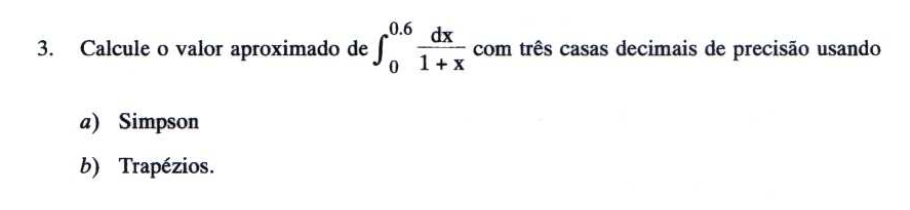

Valor esperado: 0.470004

In [20]:
ex3_expected = 0.470004

In [21]:
ex3 = {
    "f": lambda x: 1 / (1 + x),
    "a": 0,
    "b": 0.6,
}

ex3_results = {
    "trapezio": regra_trapezios(**ex3, r=1), # Trapézio simples
    "simpson": regra_simpson(**ex3, r=2), # Simpson simples
}

ex3_results = {k: np.round(v, 3) for k, v in ex3_results.items()}

In [22]:
display("Resultados para o Exercício 3:", ex3_results)
display("Erros para o Exercício 3:", {k: np.abs(v - ex3_expected) for k, v in ex3_results.items()})

'Resultados para o Exercício 3:'

{'trapezio': np.float64(0.488), 'simpson': np.float64(0.47)}

'Erros para o Exercício 3:'

{'trapezio': np.float64(0.017996000000000012),
 'simpson': np.float64(4.000000000004e-06)}

# Exercício 4.

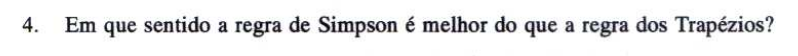

A vantagem da utilização da Regra de Simpson sobre a Regra dos Trapézios é sua ordem de convergência superior. Isso significa que um número menor de regiões (ou pontos) é necessário para alcançar uma mesma precisão. Ou seja, fornece resultados mais precisos. Uma possível desvantagem é a complexidade de implementação, e a necessidade de que o número de subintervalos seja par, o que pode limitar sua aplicabilidade em certos casos.

# Exercício 5.

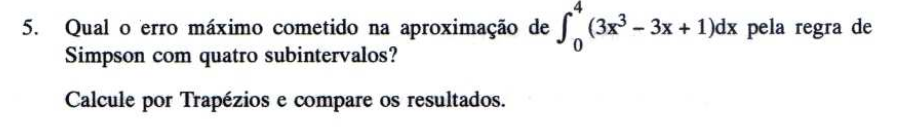

O erro máximo cometido pode ser calculado a partir de uma expressão já apresentada anteriormente nessa lista. No caso, como

$$ f(x) = 3x^3 - 3x + 1 \Rightarrow f^{(4)} (x) = 0 $$

Logo o erro máximo vai ser nulo, ou seja, 0, independente do valor de N utilizado. Por essa mesma razão, a Regra de Simpson é exata para qualquer polinômios de grau até 3. Portanto, qualquer valor de N utilizado resultará na integral exata, que é 172.

Valor esperado: 172

In [23]:
ex5_expected = 172.

ex5 = {
    "f": lambda x: 3 * x**3 - 3 * x + 1,
    "a": 0,
    "b": 4,
}

ex5_results = {
    "trapezios": regra_trapezios(**ex5, r=4),
    "simpson": regra_simpson(**ex5, r=4),
}
ex5_errors = {k: np.abs(v - ex5_expected) for k, v in ex5_results.items()}

In [24]:
display("Resultados obtidos no Exercício 5:", ex5_results)
display("Erros obtidos no Exercício 5:", ex5_errors)

'Resultados obtidos no Exercício 5:'

{'trapezios': np.float64(184.0), 'simpson': np.float64(172.0)}

'Erros obtidos no Exercício 5:'

{'trapezios': np.float64(12.0), 'simpson': np.float64(0.0)}

# Exercício 6.

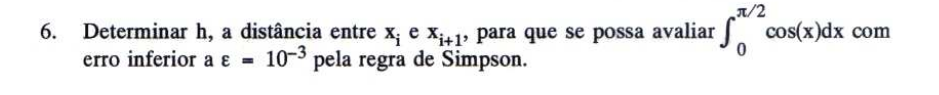

Dado $f(x) = \cos(x)$, temos $f^{(4)} (x) = \cos(x)$. Como o maior valor dessa derivada no intervalo $[0, \pi/2]$ é 1, podemos calcular o erro máximo da Regra de Simpson como:

$$ |E(f)| < \frac{(\pi/2 - 0)^5}{180 N^4} \cdot 1 = \frac{(\pi/2)^5}{180 N^4} $$

Para garantirmos a inequação anterior, precisamos que:

$$ \frac{(\pi/2)^5}{180 N^4} < 10^{-5} \Rightarrow N^4 > \frac{(\pi/2)^5}{180 \cdot 10^{-5}} \Rightarrow \sqrt[4]{\frac{(\pi/2)^5}{180 \cdot 10^{-5}}} $$

Por fim, $N > 8.53751972$, portanto, devemos tomar $N = 10$.

In [27]:
ex6_expected = 1.0

ex6 = {
    "f": lambda x: np.cos(x),
    "a": 0,
    "b": np.pi / 2,
}
ex6_results = {
    "simpson_r10": regra_simpson(**ex6, r=10),
}
display("Resultados para o Exercício 6:", ex6_results)
display("Erros para o Exercício 6:", {k: np.abs(v - ex6_expected) for k, v in ex6_results.items()})

'Resultados para o Exercício 6:'

{'simpson_r10': np.float64(1.0000033922209006)}

'Erros para o Exercício 6:'

{'simpson_r10': np.float64(3.3922209006220783e-06)}

# Exercício 7.

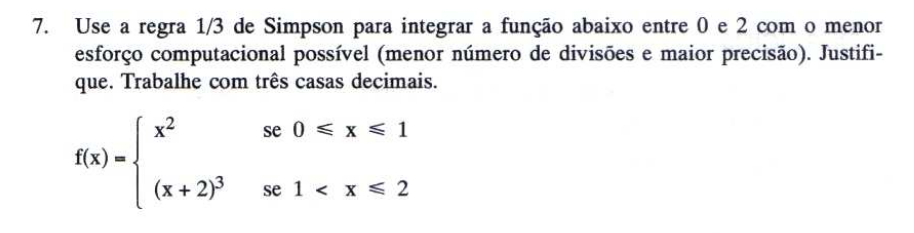

# Exercício 8.

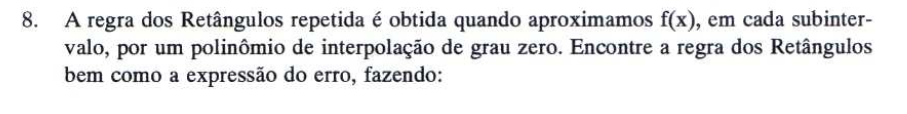

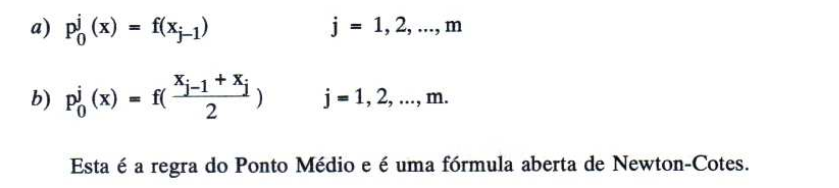

# Exercício 9.

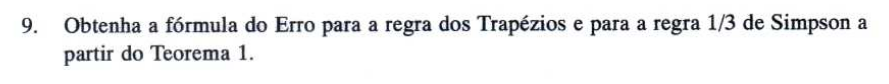

# Exercício 10.

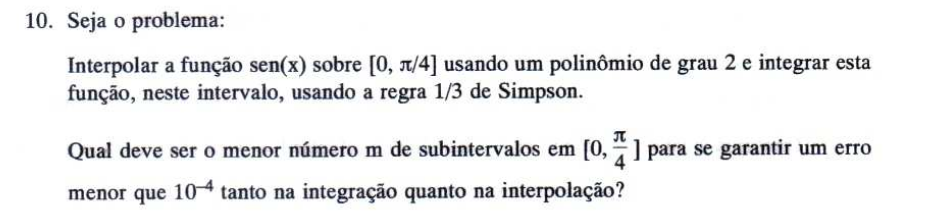

# Exercício 11.

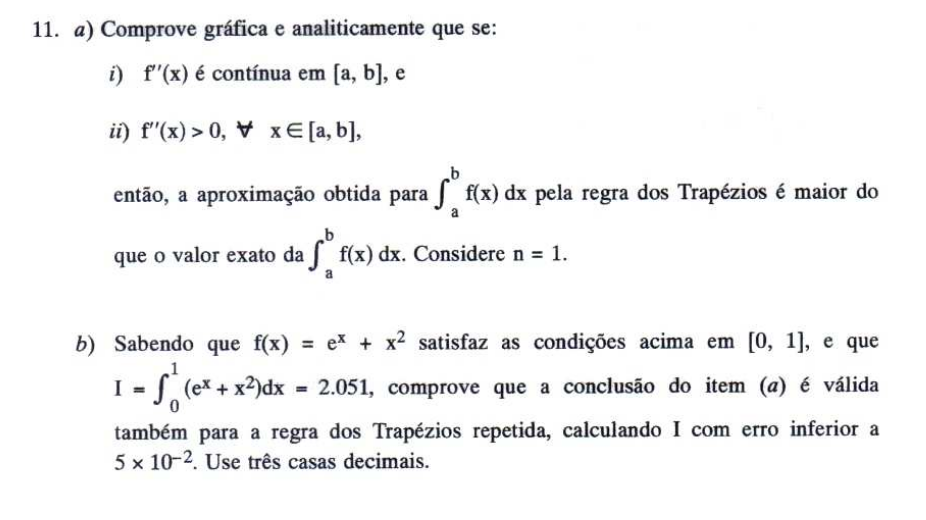

# Exercício 12.

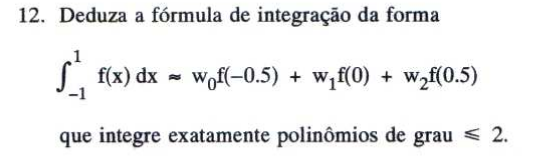

# Exercício 13.

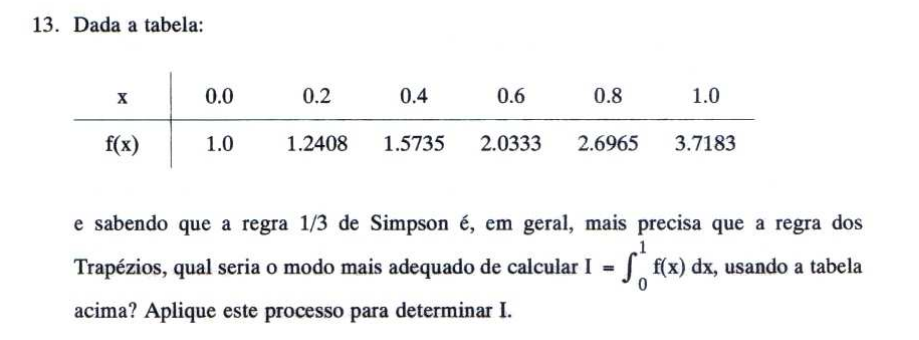

Temos 6 pontos e 5 subintervalos, logo, $N = 5$. Dessa maneira, não é possível aplicar a Regra de Simpson composta. No entanto, podemos aplica a Regra de Simpson nos primeiros 4 subintervalos e a Regra dos Trapézios no último subintervalo.

In [61]:
def regra_trapezios_tabelada(pontos: np.ndarray) -> float:
    n = len(pontos)
    h = pontos[1] - pontos[0]
    integral_soma = (pontos[0] + pontos[-1]) / 2
    for i in range(1, n - 1):
        integral_soma += pontos[i]
    return h * integral_soma

def regra_simpson_tabelada(pontos: np.ndarray) -> float:
    r = len(pontos) - 1
    if r % 2 != 0:
        raise ValueError("Número de subintervalos deve ser par para a Regra de Simpson composta.")
    h = pontos[1] - pontos[0]
    integral_soma = pontos[0] + pontos[-1]
    for i in range(1, r):
        mult = 2 + 2 * (i % 2 == 1)
        integral_soma += mult * pontos[i]
    return (h / 3) * integral_soma

ex13 = {
    "pontos": np.array([1.0, 1.2408, 1.5735, 2.0333, 2.6965, 3.7183])
}
ex13_result = 0.0
ex13_result += regra_simpson_tabelada(ex13["pontos"][:5])
ex13_result += regra_trapezios_tabelada(ex13["pontos"][4:])
display("Valor aproximado de I para o Exercício 13 (arredondado):", f"{ex13_result:.4f}")
display("Valor aproximado de I para o Exercício 13 (truncado):", trunc_n_decimals(ex13_result, 4))

'Valor aproximado de I para o Exercício 13 (arredondado):'

'4.8778'

'Valor aproximado de I para o Exercício 13 (truncado):'

np.float64(4.8778)

# Exercício 14.

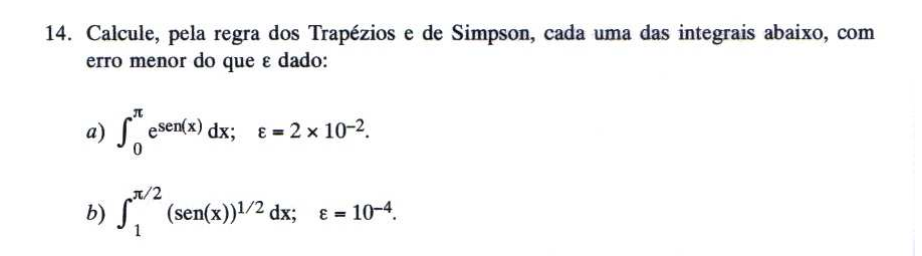

# Exercício 15.

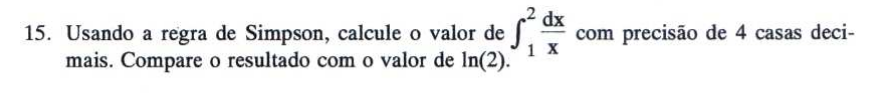

$f(x) = \displaystyle\frac{1}{x}$, logo $f^{(4)} = \displaystyle\frac{24}{x^5}$. No intervalo de $[1, 2]$, o maior valor (em módulo) da quarta derivada ocorre em $x = 1$, resultando em $|f^{(4)} (1)| = 24$.

Para garantirmos que o resultado será correto até a quarta casa decimal, precisamos que o erro seja menor que $10^{-4}$.

Dado o erro máximo da Regra de Simpson:

$$ |E(f)| < \frac{(2 - 1)^5}{180 N^4} \cdot 24 = \frac{24}{180 N^4} = \frac{2}{15 N^4} $$

Portanto:

$$ \frac{2}{15 N^4} < 10^{-4} \Rightarrow N^4 > \frac{2}{15 \cdot 10^{-4}} \Rightarrow N > \sqrt[4]{\frac{2}{15 \cdot 10^{-4}}} $$

$ N > 6.04275079$, logo, devemos tomar $N = 8$.

In [45]:
ex15 = {
    "f": lambda x: 1 / x,
    "a": 1,
    "b": 2,
}

ex15_result = regra_simpson(**ex15, r=8)
display("Valor aproximado da integral do Exercício 15:", f"{ex15_result:.4f}")
display("Comparando com o valor exato (ln 2):", f"{np.log(2):.4f}")

'Valor aproximado da integral do Exercício 15:'

'0.6932'

'Comparando com o valor exato (ln 2):'

'0.6931'

Apesar do N calculado, a quarta casa decimal do resultado obtido com N = 8 está incorreta. Portanto, é necessário aumentar N para garantir a precisão desejada. Vamos delimitar o limite do erro como $10^{-5}$ e recalcular N.

Isso ocorre pois ao invés de truncar o resultado na quarta casa decimal, a linguagem Python por padrão arredonda o valor. Se truncarmos o valor, o resultado com N = 8 estaria correto:

In [ ]:
display("Valor aproximado da integral do Exercício 15:", trunc_n_decimals(ex15_result, 4))
display("Comparando com o valor exato (ln 2):", trunc_n_decimals(np.log(2), 4))

'Valor aproximado da integral do Exercício 15:'

np.float64(0.6931)

'Comparando com o valor exato (ln 2):'

np.float64(0.6931)

Para garantir que a quarta casa decimal esteja correta mesmo com arredondamento, devemos garantir que o erro seja menor que $10^{-5}$.

$$ \frac{2}{15 N^4} < 10^{-5} \Rightarrow N^4 > \frac{2}{15 \cdot 10^{-5}} \Rightarrow N > \sqrt[4]{\frac{2}{15 \cdot 10^{-5}}} $$

$ N > 10.74569932$, logo, devemos tomar $N = 12$.

In [48]:
ex15_result_2 = regra_simpson(**ex15, r=12)
display("Valor aproximado da integral do Exercício 15:", f"{ex15_result_2:.4f}")
display("Comparando com o valor exato (ln 2):", f"{np.log(2):.4f}")

'Valor aproximado da integral do Exercício 15:'

'0.6931'

'Comparando com o valor exato (ln 2):'

'0.6931'

Agora está correto até a quarta casa decimal. Para curiosidade, se tomarmos todos os dígitos presentes no `np.float64` resultante do cálculo:

In [49]:
display("Valor aproximado da integral do Exercício 15:", f"{ex15_result_2}")
display("Comparando com o valor exato (ln 2):", f"{np.log(2)}")

'Valor aproximado da integral do Exercício 15:'

'0.6931486622091003'

'Comparando com o valor exato (ln 2):'

'0.6931471805599453'

Logo o resultado fica incorreto na sexta casa decimal.

# Exercício 16.

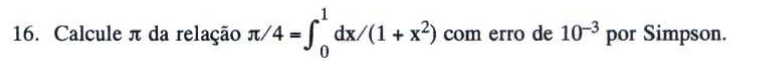

Dada $f(x) = \displaystyle\frac{1}{1 + x^2}$, obtém-se as derivadas:

$$ f'(x) = \frac{-2x}{(1 + x^2)^2} $$
$$ f''(x) = \frac{6 x^2 - 2}{x^6 + 3 x^4 + 3 x^2 + 1} $$
$$ f'''(x) = \frac{-24 x^3 + 24 x}{x^8 + 4 x^6 + 6 x^4 + 4 x^2 + 1} $$
$$ f^{(4)} (x) = \frac{120 x^4 - 240 x^2 + 24}{x^10 + 5 x^8 + 10 x^6 + 10 x^4 + 5x^2 + 1} $$

Por conta do domínio do intervalo de integração $[0, 1]$, o maior valor (em módulo) da quarta derivada ocorre em $x = 0$, resultando em $|f^{(4)} (0)| = 24$.

Usando a Regra de Simpson, o erro máximo é dado por:

$$ |E(f)| < \frac{(1 - 0)^5}{180 N^4} \cdot 24 = \frac{24}{180 N^4} = \frac{2}{15 N^4} $$

Aplicando a restrição

$$ \frac{2}{15 N^4} < 10^{-3} \Rightarrow N^4 > \frac{2}{15 \cdot 10^{-3}} \Rightarrow N > \sqrt[4]{\frac{2}{15 \cdot 10^{-3}}} $$

$N > 3.39808849 $, logo, devemos tomar $N = 4$.

In [40]:
ex16 = {
    "f": lambda x: 1 / (1 + x**2),
    "a": 0,
    "b": 1,
    "r": 4,
}

ex16_result = regra_simpson(**ex16)
display("Lado direito da equação do Exercício 16:", f"{ex16_result:.3f}")

'Lado direito da equação do Exercício 16:'

'0.785'

Como

$$ \frac{\pi}{4} = 0.785 \Rightarrow \pi = 4 \cdot 0.785 \Rightarrow \pi = 3.14 $$

Que é correto para 3 algarismos significativos.

**Apenas por curiosidade**, se tomarmos todos os dígitos presentes no `np.float64` resultante do cálculo:

In [41]:
display(ex16_result)

np.float64(0.7853921568627451)

Logo:

$$ \frac{\pi}{4} = 0.7853921568627451 \Rightarrow \pi = 3.1415686274509804 $$

O primeiro algarismo errado é a quinta casa decimal.

# Exercício 17.

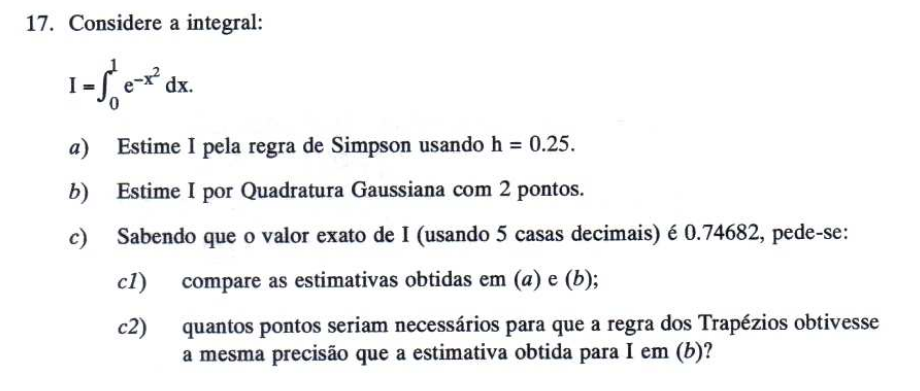

Primeiramente, declarando o método que realiza quadratura gaussiana, com transformação do intervalo de integração:

In [32]:
def quadratura_gaussiana(f: Callable[[float], float], a: float, b: float, n: int) -> float:
    # [a, b] |---> [-1, 1]
    pontos, pesos = np.polynomial.legendre.leggauss(n)
    # Transformação linear dos pontos
    pontos_transformados = 0.5 * (b - a) * pontos + 0.5 * (a + b)
    integral_soma = 0.0
    for i in range(n):
        integral_soma += pesos[i] * f(pontos_transformados[i])
    return 0.5 * (b - a) * integral_soma

In [28]:
ex17_expected = 0.74682413

## Item a), b) e c1)

In [36]:
ex17 = {
    "f": lambda x: np.exp(- np.power(x, 2)),
    "a": 0.,
    "b": 1.,
}

ex17_results = {
    "regra_trapezios": regra_trapezios(**ex17, r=4),
    "quadratura_gaussiana": quadratura_gaussiana(**ex17, n=2),
}
display("Resultados para o Exercício 17:", ex17_results)
display("Erros para o Exercício 17:", {k: np.abs(v - ex17_expected) for k, v in ex17_results.items()})

'Resultados para o Exercício 17:'

{'regra_trapezios': np.float64(0.7429840978003812),
 'quadratura_gaussiana': np.float64(0.7465946882828597)}

'Erros para o Exercício 17:'

{'regra_trapezios': np.float64(0.0038400321996188147),
 'quadratura_gaussiana': np.float64(0.000229441717140344)}

## Item c2)